In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

def generate_random_numbers01(N, dim, max_v = 10000):
    """
    Generate random numbers between 0 and 1
    max_v: maximum value used to generate random integers
    """
    random_ints = np.random.randint(max_v, size=(N, dim))
    init_lb = 0
    return (random_ints - init_lb)/(max_v - 1 - init_lb)

def generate_random_numbers(N, dim, max_v, lb, ub):
    """
    Generate random numbers between 'lb' and 'ub'
    """
    zero_to_one_points = generate_random_numbers01(N, dim, max_v)
    res = lb + (ub - lb)*zero_to_one_points
    return res

def generate_random_ring(N, r1, r2, max_v):
    """Generate random numbers in a ring between r1 and r2
    """
    radiuses = generate_random_numbers(N, 1, max_v, r1, r2)
    radians = generate_random_numbers(N, 1, max_v, 0, 2.0*math.pi)
    return radiuses, radians

def move_bottom_ring_and_assign(radiuses, radians, diffx, diffy):
    """
    Give the points within a ring, move the bottom half 'diffx' and 'diffy' along
    x and y directions respectively. Assign the bottom points to have sign -1
    """
    xs = radiuses * np.cos(radians)
    ys = radiuses * np.sin(radians)
    signs = np.ones(len(xs))

    for idx, r in enumerate(radiuses):
        rad = radians[idx]
        xi, yi = xs[idx], ys[idx]
        if rad > math.pi and rad < 2*math.pi:
            xs[idx] = xi + diffx
            ys[idx] = yi +  diffy
            signs[idx] = -1
    return xs, ys, signs

def perceptron(points, dim, max_it=100, use_adaline=False, 
               eta = 1, randomize=False, print_out = True):
    w = np.zeros(dim+1)
    xs, ys = points[:,:dim+1], points[:,dim+1]
    num_points = points.shape[0]
    for it in range(max_it):
        correctly_predicted_ids=  set()
        idxs = np.arange(num_points)
        if randomize:
            idxs = np.random.choice(np.arange(num_points), num_points, replace=False)
        for idx in idxs:
            x, y = xs[idx], ys[idx]
            st = np.dot(w.T, x)
            prod = st*y #np.dot(w.T, x)*y
            if prod < -100: #avoid out of bound error
                st = -100
            threshold = 1 if use_adaline else 0
            st = st if use_adaline else 0
            if prod <= threshold:
                w = w + eta *(y-st)*x
                break #PLA picks one example at each iteration
            else:
                correctly_predicted_ids.add(idx)
        if len(correctly_predicted_ids) == num_points:
            break
    
    rou = math.inf
    R = 0
    c = 0
    for x, y in zip(xs, ys):
        prod = np.dot(w.T, x)*y
        if prod > 0:
            c +=1
        if prod < rou:
            rou = prod
        abs_x = np.linalg.norm(x)
        if abs_x > R:
            R = abs_x
    theoretical_t = (R**2) * (np.linalg.norm(w)**2)/rou/rou #LFD problem 1.3
    #w = w/w[-1]
    if print_out:
        print('Final correctness: ', c, '. Total iteration: ', it)
        print('Final w:', w)
    return w, it, theoretical_t


Final correctness:  2000 . Total iteration:  198
Final w: [3.80000000e+01 5.78765286e-02 1.82320749e+02]
Final correctness:  2000 . Total iteration:  101
Final w: [ 33.           0.1588492  143.66686184]
Final correctness:  2000 . Total iteration:  17
Final w: [ 5.00000000e+00 -4.60451803e-02  5.21259279e+01]
Final correctness:  2000 . Total iteration:  17
Final w: [ 5.00000000e+00 -4.60451803e-02  5.33259279e+01]
Final correctness:  2000 . Total iteration:  44
Final w: [16.          0.82251301 87.98430896]
Final correctness:  2000 . Total iteration:  45
Final w: [19.         -1.10280695 88.80323921]
Final correctness:  2000 . Total iteration:  37
Final w: [15.          0.54283009 82.21868928]
Final correctness:  2000 . Total iteration:  34
Final w: [14.          1.27189067 79.03559798]
Final correctness:  2000 . Total iteration:  34
Final w: [14.          1.27189067 81.03559798]
Final correctness:  2000 . Total iteration:  34
Final w: [18.          0.76432899 74.23059678]
Final correc

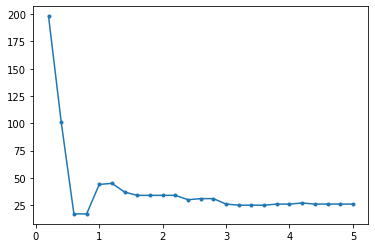

In [6]:
N = 2000
max_v = 10000
rad, thk = 10, 5
eta = 1
use_adaline=False
maxit = 1000
dim = 2
seps = np.arange(0.2, 5.2, 0.2)

radiuses, radians = generate_random_ring(N, rad, rad+thk, max_v)
its, threoticals_ts = [], []
for sep in seps:
    xs, ys, signs = move_bottom_ring_and_assign(radiuses, radians, rad + thk/2.0, -sep)
    df = pd.DataFrame({'x1':xs.flatten(), 'x2':ys.flatten(), 'y':signs.flatten()})
    df['x0'] = 1
    df = df[['x0','x1','x2','y']]
    positives = df.loc[df['y']==1]
    negatives = df.loc[df['y']==-1]
    norm_g, num_its, theoretical_t = perceptron(df.values, dim, maxit, use_adaline, eta, 
                                                   randomize=False, print_out = True)
    its.append(num_its)
    threoticals_ts.append(theoretical_t)

plt.plot(seps, its, marker='.')